In [54]:
# imports
import os
import hydra
from omegaconf import DictConfig
from datetime import datetime
from typing import Union
import cv2
import numpy as np
import scipy.signal as ss

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# import bag reader and processor modules
from bag_reader.bag_reader import BagReader
from bag_processor import DepthHandler, ImageHandler
dp = DepthHandler()
ih = ImageHandler()



In [124]:
line = np.load('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-12-12-15-24-09/plots/feature/plot_150.npy')

In [56]:
line[1].min()

0.802

In [125]:
subtracted = np.subtract(line[1][1:],line[1][:-1])
subtracted = np.concatenate([[0],subtracted])
subtracted_abs = np.abs(subtracted)
id_max = np.argmax(subtracted_abs)
#print(subtracted)
print(np.max(subtracted_abs))
print(np.min(subtracted_abs))
print(subtracted.mean())
print(id_max)

0.2475000023841858
0.0
-0.0018111109733581544
276


In [108]:
df = pd.DataFrame(line[1].tolist())
df.head()

,0
0,1.663
1,1.663
2,1.663
3,1.663
4,1.663


In [109]:
df_sub = pd.DataFrame(subtracted.tolist())
df_sub.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [60]:
df.describe()

,0
count,360.000000
mean,0.941878
std,0.069302
min,0.802000
25%,0.892500
50%,0.946500
75%,0.994000
max,1.074000


In [126]:
peaks_line, properties_line = ss.find_peaks(line[1],distance=20, width=10)
peaks_sub, properties_sub = ss.find_peaks(subtracted,distance=20)
properties_line["prominences"], properties_line["widths"]


(array([0.03799999, 0.12599993, 0.0539999 , 0.065     ]),
 array([15.83333996, 41.74999255, 24.66665342, 27.47424777]))

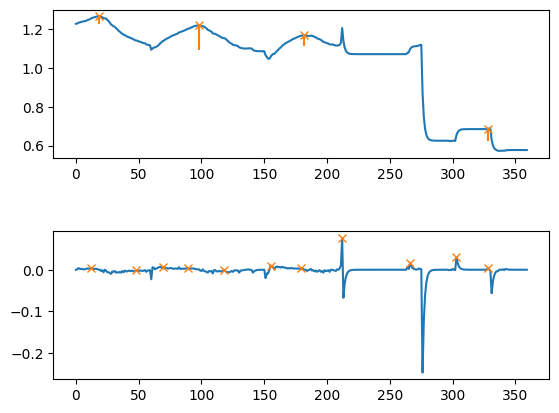

In [127]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)




ax1.plot(line[0],line[1])
ax1.plot(peaks_line,line[1][peaks_line],"x")
ax1.vlines(x=peaks_line, ymin=line[1][peaks_line] - properties_line["prominences"],
           ymax = line[1][peaks_line], color = "C1")
# ax1.hlines(y=properties_line["widths"], xmin=properties_line["left_ips"],
#            xmax=properties_line["right_ips"], color = "C1")
ax2.plot(line[0],subtracted)
ax2.plot(peaks_sub,subtracted[peaks_sub],"x")



plt.show()

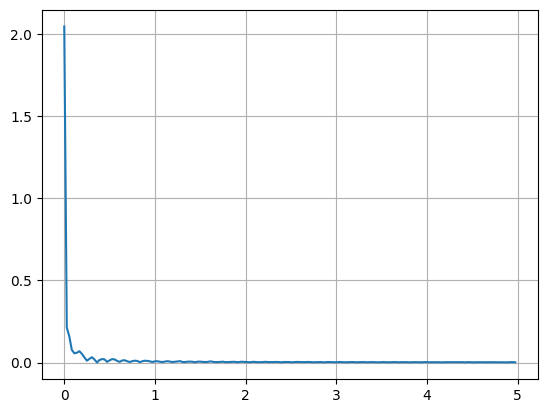

In [128]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(line[1])
# sample spacing
T = 1.0 / 10
x = range(N)
y = line[1]
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()